In [1]:
# Basic setting
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 클러스터링 알고리즘

## [P.1] K-Means 알고리즘

라벨이 없는 데이터셋에 대한 클러스터링 알고리즘들을 구현해볼 것입니다.    
데이터셋은 `make_blobs`를 통해 인위적인 데이터셋을 사용해보겠습니다.    
먼저, [`K-Means`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) 알고리즘으로 학습하고 평가해봅시다.

In [2]:
from sklearn.datasets import make_blobs

num_classes = 5

X, y = make_blobs(n_samples=1000, n_features=2, centers=num_classes)

print(X.shape, y.shape)

(1000, 2) (1000,)


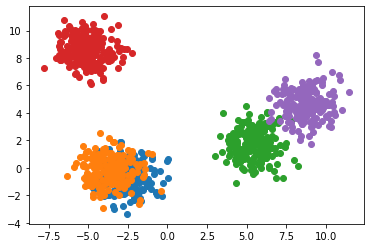

In [3]:
for cls in range(num_classes):
    plt.scatter(X[:, 0][y == cls], X[:, 1][y == cls])

In [4]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=num_classes, n_init=num_classes, init='random')
kmeans.fit(X)

KMeans(init='random', n_clusters=5, n_init=5)

In [5]:
# get centroid
print('Cetroid points: ')
print(kmeans.cluster_centers_)

Cetroid points: 
[[ 5.44037005  1.73391819]
 [ 8.71143976  4.59238864]
 [-2.10687232 -0.77125375]
 [-5.15474806  8.58677223]
 [-3.90315459 -0.16297085]]


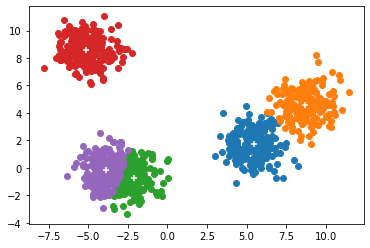

In [6]:
for cls in range(num_classes):
    plt.scatter(X[:, 0][kmeans.labels_ == cls], X[:, 1][kmeans.labels_ == cls])
    
for cent in kmeans.cluster_centers_:
    plt.scatter(cent[0], cent[1], marker='+', color='w')

#### 새로운 데이터셋 포인트가 들어오면, `predict` 메써드를 통해 클러스터를 배정해줄 수 있습니다.

In [7]:
X_sample = np.array([[3, 0]])
y_pred = kmeans.predict(X_sample)

print(y_pred)

[0]


In [8]:
# method 1
from sklearn.metrics.pairwise import euclidean_distances

print(euclidean_distances(X_sample, kmeans.cluster_centers_))

# method 2
print(kmeans.transform(X_sample))

[[ 2.99363964  7.32875007  5.1647824  11.8419835   6.90507805]]
[[ 2.99363964  7.32875007  5.1647824  11.8419835   6.90507805]]


#### `init` argument 값을 변경하면, K-Means++의 최신 알고리즘을 사용할 수 있습니다.

In [9]:
kmeans_plus2 = KMeans(n_clusters=num_classes, n_init=num_classes, init='k-means++')
kmeans_plus2.fit(X)

KMeans(n_clusters=5, n_init=5)

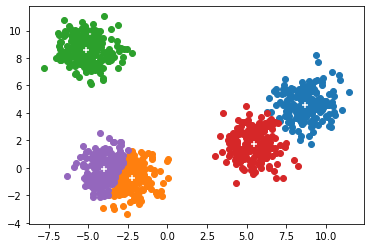

In [10]:
for cls in range(num_classes):
    plt.scatter(X[:, 0][kmeans_plus2.labels_ == cls], X[:, 1][kmeans_plus2.labels_ == cls])
    
for cent in kmeans_plus2.cluster_centers_:
    plt.scatter(cent[0], cent[1], marker='+', color='w')

#### 실루엣 분석은 다음과 같이 진행하면 됩니다. 실루엣 점수를 통해 가장 적절한 클러스터 개수를 찾아보세요.

In [11]:
from sklearn.metrics import silhouette_score

num_cluster = [2, 3, 4, 5]

for nc in num_cluster:
    kmeans = KMeans(n_clusters=nc, n_init=nc, init='random')
    y_pred = kmeans.fit_predict(X)
    
    score = silhouette_score(X, y_pred)
    
    print('With %s cluster number, K-means score : %.4f' % (nc, score))

With 2 cluster number, K-means score : 0.6266
With 3 cluster number, K-means score : 0.7570
With 4 cluster number, K-means score : 0.7089
With 5 cluster number, K-means score : 0.5353


## [P.2] DBSCAN 알고리즘

### Q.1 K-Means 알고리즘의 문제점은 무엇이었나요?

위의 문제점을 해결할 수 있는 [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)을 구현해보고, 실제로 잘 동작하는지 살펴봅시다.

In [12]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1)
print(X.shape, y.shape)

(1000, 2) (1000,)


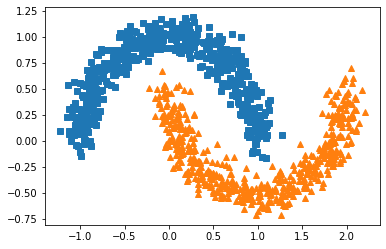

In [13]:
def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
    
plot_dataset(X, y)

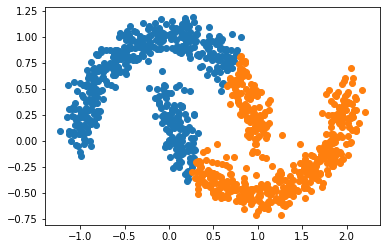

In [14]:
# use K-Means

num_classes = 2
kmeans = KMeans(n_clusters=num_classes, n_init=num_classes, init='random')
kmeans.fit(X)

for cls in range(num_classes):
    plt.scatter(X[:, 0][kmeans.labels_ == cls], X[:, 1][kmeans.labels_ == cls])
    
for cent in kmeans.cluster_centers_:
    plt.scatter(cent[0], cent[1], marker='+', color='w')

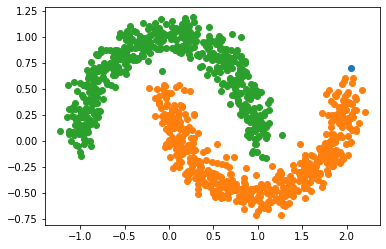

In [16]:
# use DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=30)
y_pred = dbscan.fit_predict(X)

# -1 means outlier
for cls in np.unique(y_pred):
    plt.scatter(X[:, 0][y_pred == cls], X[:, 1][y_pred == cls])